In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Define the project root as the directory containing the notebook, or adjust as needed
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Define the path to the JSON file relative to the project root
json_file_path = os.path.join(PROJECT_ROOT, 'data', 'raw', 'combined_organizations.json')

# Load the JSON file into a pandas DataFrame
def load_json_as_dataframe(file_path):
    return pd.read_json(file_path, orient='records')

# Load the combined_organizations.json file
combined_organizations = load_json_as_dataframe(json_file_path)

# Now, combined_organizations_df contains the loaded data in a pandas DataFrame
print(combined_organizations.info())  # This will give you an overview of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451528 entries, 0 to 451527
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SME                 382461 non-null  object 
 1   active              382461 non-null  object 
 2   activityType        382461 non-null  object 
 3   city                382461 non-null  object 
 4   contactForm         382461 non-null  object 
 5   contentUpdateDate   382461 non-null  object 
 6   country             382461 non-null  object 
 7   ecContribution      382461 non-null  object 
 8   endOfParticipation  382461 non-null  object 
 9   geolocation         382461 non-null  object 
 10  name                451528 non-null  object 
 11  netEcContribution   382461 non-null  object 
 12  nutsCode            382461 non-null  object 
 13  order               382461 non-null  float64
 14  organisationID      382461 non-null  object 
 15  organizationURL     382461 non-nul

city
Paris                  12345
Madrid                  7325
Roma                    6993
Bruxelles / Brussel     6737
Munchen                 5674
Barcelona               5172
London                  5085
Wien                    4857
Berlin                  3703
Milano                  3631
Name: count, dtype: int64
country
DE    47036
ES    38431
FR    36931
UK    36508
IT    36179
NL    23884
BE    18213
EL    12343
SE    11694
CH    11140
Name: count, dtype: int64
city           69067
country        69067
geolocation    69067
dtype: int64


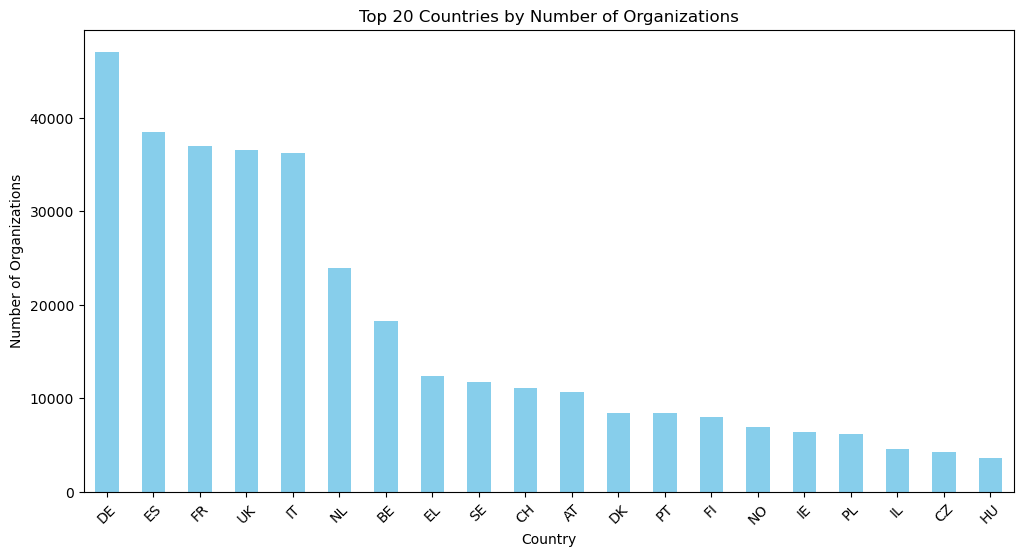

In [4]:
# Summary statistics of geographical data
print(combined_organizations['city'].value_counts().head(10))
print(combined_organizations['country'].value_counts().head(10))

# Check for missing values in geographical columns
print(combined_organizations[['city', 'country', 'geolocation']].isnull().sum())

# Visualizing the distribution of organizations by country
plt.figure(figsize=(12, 6))
combined_organizations['country'].value_counts().head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Countries by Number of Organizations')
plt.xlabel('Country')
plt.ylabel('Number of Organizations')
plt.xticks(rotation=45)
plt.show()



In [5]:
# Fill missing cities or countries with 'Unknown' (or another strategy)
combined_organizations['city'].fillna('Unknown', inplace=True)
combined_organizations['country'].fillna('Unknown', inplace=True)

# Handling geolocation - split latitude and longitude if geolocation is present
if 'geolocation' in combined_organizations.columns:
    combined_organizations[['latitude', 'longitude']] = combined_organizations['geolocation'].str.split(',', expand=True)
    combined_organizations['latitude'] = pd.to_numeric(combined_organizations['latitude'], errors='coerce')
    combined_organizations['longitude'] = pd.to_numeric(combined_organizations['longitude'], errors='coerce')

# Checking for the presence of latitude and longitude
print(combined_organizations[['latitude', 'longitude']].describe())


/tmp/ipykernel_1053669/502780992.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_organizations['city'].fillna('Unknown', inplace=True)
/tmp/ipykernel_1053669/502780992.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

            latitude      longitude
count  358536.000000  358536.000000
mean       47.181587       7.937921
std        10.171363      19.210041
min       -51.623292    -176.174022
25%        43.291695       2.010766
50%        48.833618       7.235541
75%        51.988493      13.378217
max        78.224619     178.453162


In [6]:
# Filter for London organizations
london_organizations = combined_organizations[(combined_organizations['country'] == 'UK') & (combined_organizations['city'].str.contains('London', case=False, na=False))]

# Check the size of the filtered dataset
print(f"Number of organizations in London: {len(london_organizations)}")
london_organizations.head()

Number of organizations in London: 7766


,SME,active,activityType,city,contactForm,contentUpdateDate,country,ecContribution,endOfParticipation,geolocation,...,id,outcomeid,href,created,updated,regNumber,website,addresses,latitude,longitude
67,,,HES,London,https://ec.europa.eu/info/funding-tenders/oppo...,2022-01-27 18:24:07,UK,469942.4,False,"51.4282951,-0.1764894",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.428295,-0.176489
69,,,OTH,LONDON,https://ec.europa.eu/info/funding-tenders/oppo...,2019-07-16 09:40:06,UK,136329,False,"51.5073219,-0.1276474",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.507322,-0.127647
76,,,REC,LONDON,https://ec.europa.eu/info/funding-tenders/oppo...,2022-05-25 22:14:29,UK,2275156.6,False,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,,,OTH,London,https://ec.europa.eu/info/funding-tenders/oppo...,2022-05-25 14:43:36,UK,164652.4,False,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,,,HES,London,https://ec.europa.eu/info/funding-tenders/oppo...,2016-10-24 09:55:05,UK,184591.2,False,"51.5207316,-0.1294867",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.520732,-0.129487


In [7]:
# Handle missing latitude and longitude
london_organizations = london_organizations.dropna(subset=['latitude', 'longitude'])

# Check how much data remains after filtering out missing geolocations
print(f"Number of London organizations with geolocation data: {len(london_organizations)}")


Number of London organizations with geolocation data: 7322


In [ ]:
#! Super compute expensive
# import folium

# # Create a base map centered around London
# m = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

# # Add points to the map for London organizations
# for idx, row in london_organizations.iterrows():
#     folium.Marker([row['latitude'], row['longitude']], popup=row['name']).add_to(m)

# # Display the map
# m


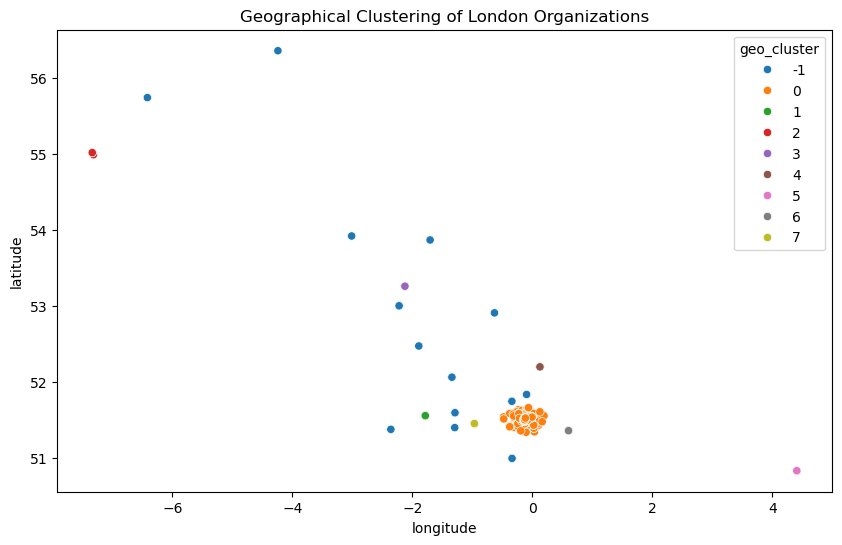

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Prepare the data for clustering
geo_coords_london = london_organizations[['latitude', 'longitude']]

# Normalize the data
scaler = StandardScaler()
geo_scaled_london = scaler.fit_transform(geo_coords_london)

# Apply DBSCAN clustering
db_london = DBSCAN(eps=0.5, min_samples=5).fit(geo_scaled_london)
london_organizations['geo_cluster'] = db_london.labels_

# Visualize the clustering result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='geo_cluster', data=london_organizations, palette='tab10', legend='full')
plt.title('Geographical Clustering of London Organizations')
plt.show()


In [11]:
# Group by the cluster and list unique names within each cluster
potential_dupes_london = london_organizations.groupby('geo_cluster')['name'].unique().reset_index()

# Display potential duplicates
for _, row in potential_dupes_london.iterrows():
    print(f"Cluster {row['geo_cluster']}:")
    for name in row['name']:
        print(f" - {name}")
    print("\n" + "-"*40 + "\n")


Cluster -1:
 - RENEW TECHNOLOGIES LTD
 - PHASECRAFT LIMITED
 - KARTEN NETWORK LTD
 - GMV INNOVATING SOLUTIONS LTD
 - Buro Happold Limited
 - ARRIVAL LTD
 - INTERNATIONAL HEALTH TERMINOLOGY STANDARDS DEVELOPMENT ORGANISATION
 - NEUROGEARS LTD
 - MAYDAY ROOMS
 - AFTON CHEMICAL LIMITED
 - SENIOR UK LTD
 - Move it or Lose it
 - LOC8TOR LIMITED
 - Shell International Trading and Shipping Company Ltd

----------------------------------------

Cluster 0:
 - ST GEORGE'S HOSPITAL MEDICAL SCHOOL
 - GENETIC ALLIANCE UK LTD
 - LONDON SCHOOL OF HYGIENE AND TROPICAL MEDICINE ROYAL CHARTER
 - MOORFIELDS EYE HOSPITAL NHS FOUNDATION TRUST
 - Delphi Diesel Systems LTD
 - THE FRANCIS CRICK INSTITUTE LIMITED
 - LONDON SCHOOL OF ECONOMICS AND POLITICAL SCIENCE
 - CANCER RESEARCH UK LBG
 - Institute for Fiscal Studies
 - LONDON BUSINESS SCHOOL
 - INSTITUTE OF CANCER RESEARCH: THE ROYAL CANCER HOSPITAL LBG
 - GOLDSMITHS' COLLEGE
 - UNIVERSITY OF LONDON
 - The Department Of Energy and Climate Change
 - DEPART